<a href="https://colab.research.google.com/github/SChiu-project/CUSCS-m3/blob/main/Class4_CV_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
print(cv2.__version__)

4.7.0


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# load images
path = ''
image = cv2.imread(path + "bird.jpg") #imread = read image
print(image)

[[[ 26  78  61]
  [ 25  77  60]
  [ 24  75  61]
  ...
  [ 22  58  42]
  [ 22  58  41]
  [ 22  58  41]]

 [[ 29  81  64]
  [ 27  79  62]
  [ 25  76  62]
  ...
  [ 26  62  46]
  [ 26  62  46]
  [ 26  62  45]]

 [[ 27  81  64]
  [ 26  80  63]
  [ 24  78  61]
  ...
  [ 28  64  48]
  [ 30  63  48]
  [ 31  64  49]]

 ...

 [[  7  40  13]
  [  6  39  12]
  [  5  34  11]
  ...
  [150 219 198]
  [149 205 176]
  [138 188 154]]

 [[  1  37   7]
  [  2  37  10]
  [  2  36  12]
  ...
  [153 215 193]
  [152 198 169]
  [140 177 143]]

 [[  0  34   4]
  [  0  37   9]
  [  3  38  12]
  ...
  [150 210 186]
  [151 192 161]
  [137 168 135]]]


In [ ]:
# show resolution
image.shape
# 3 means rgb
# if black and white photos, it wont be 3

(768, 1024, 3)

In [ ]:
type(image)

numpy.ndarray

In [ ]:
image.size

2359296

In [ ]:
768*1024*3

2359296

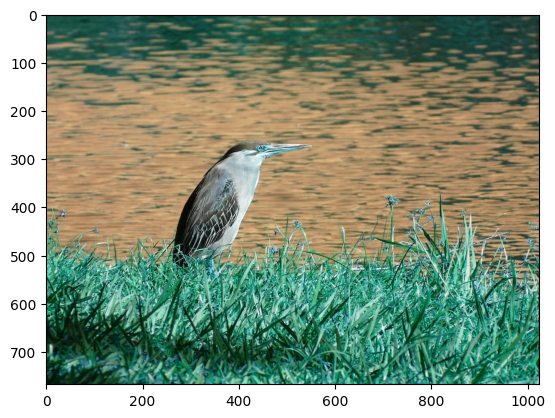

In [ ]:
plt.imshow(image)
# y-axis downward is positive

In [ ]:
# Find the RGB level in the first pixel.
# 3 layers at 0,0

print( 'first pixel: ' , image[0,0,:])

first pixel:  [26 78 61]


In [ ]:
# load images
path = ''
image2 = cv2.imread(path + "rgb300x100.jpg") #imread = read image
print(image2)

# the sequence of blue and red colour reversed

[[[  0   0 254]
  [  0   0 254]
  [  0   0 254]
  ...
  [254   0   0]
  [254   0   0]
  [254   0   0]]

 [[  0   0 254]
  [  0   0 254]
  [  0   0 254]
  ...
  [254   0   0]
  [254   0   0]
  [254   0   0]]

 [[  0   0 254]
  [  0   0 254]
  [  0   0 254]
  ...
  [254   0   0]
  [254   0   0]
  [254   0   0]]

 ...

 [[  0   0 254]
  [  0   0 254]
  [  0   0 254]
  ...
  [254   0   0]
  [254   0   0]
  [254   0   0]]

 [[  0   0 254]
  [  0   0 254]
  [  0   0 254]
  ...
  [254   0   0]
  [254   0   0]
  [254   0   0]]

 [[  0   0 254]
  [  0   0 254]
  [  0   0 254]
  ...
  [254   0   0]
  [254   0   0]
  [254   0   0]]]


[26 78 61]
[61 78 26]


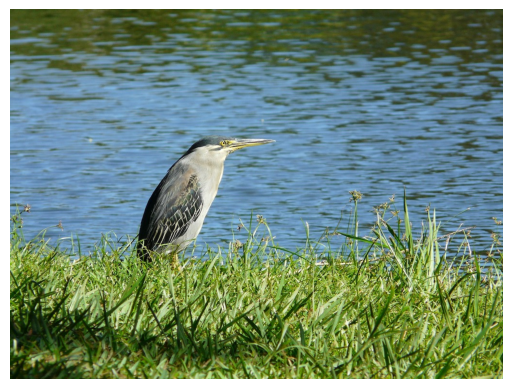

In [ ]:
# to reverse blue and red colour
image_bgr = cv2.imread(path + "bird.jpg", cv2.IMREAD_COLOR)
print(image_bgr[0,0])

image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_RGB2BGR)
print(image_rgb[0,0])

plt.imshow(image_rgb), plt.axis("off")
plt.show()

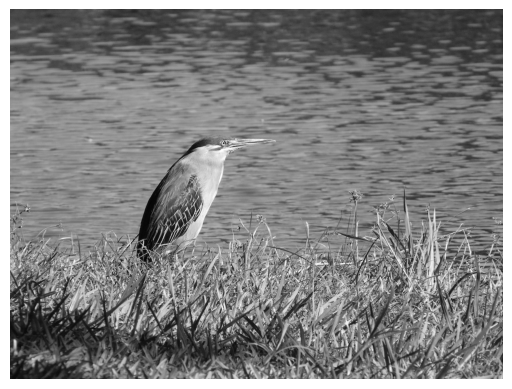

In [ ]:
#convert to grey scale
image_grey = cv2.imread(path + "bird.jpg", cv2.IMREAD_GRAYSCALE) # read is grey
plt.imshow(image_grey, cmap='gray'), plt.axis("off") # display is grey
plt.show()

# need both read and display as grey

In [ ]:
# output the image_grey
cv2.imwrite(path + "bird_grey.jpg", image_grey)

True

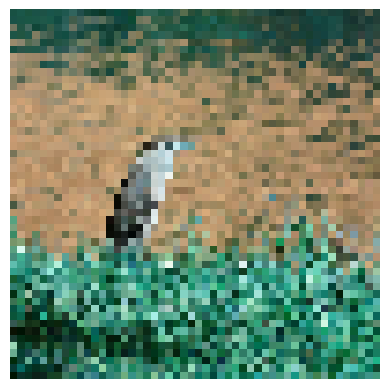

In [ ]:
# resizing the image
image_50x50 = cv2.resize(image, (50, 50))
plt.imshow(image_50x50, cmap="gray"), plt.axis("off")
plt.show()

(<matplotlib.image.AxesImage at 0x7f7c30542bf0>, (-0.5, 383.5, 383.5, -0.5))

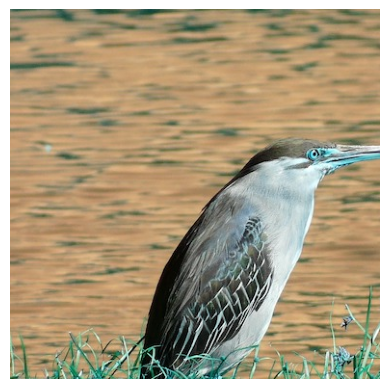

In [ ]:
# crop the image
image_cropped = image[128:512, 128:512]
plt.imshow(image_cropped), plt.axis("off")

(<matplotlib.image.AxesImage at 0x7f7c3017a410>, (-0.5, 383.5, 383.5, -0.5))

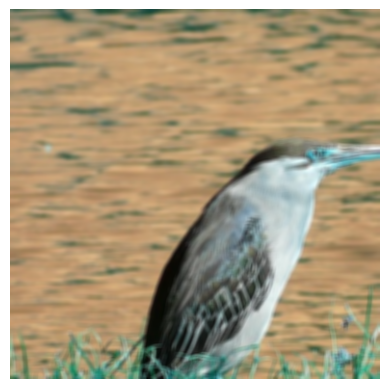

In [ ]:
# blurring the image
image_blurry = cv2.blur(image_cropped, (5,5))
plt.imshow(image_blurry), plt.axis("off")

# neighbour 5 pixels average

(<matplotlib.image.AxesImage at 0x7f7c301d2800>, (-0.5, 383.5, 383.5, -0.5))

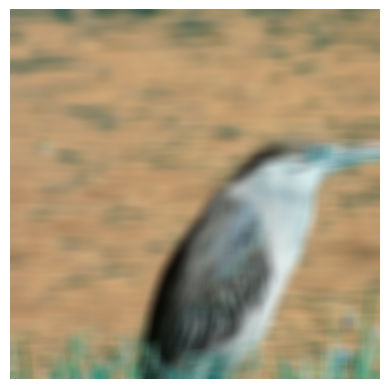

In [ ]:
image_blurry2 = cv2.blur(image_cropped, (15,15))
plt.imshow(image_blurry2), plt.axis("off")

# blurring the photo normally cannot reserve back, due to taking average cannot reserve back

In [ ]:
# Kernel
# means focus on centre
# a filter
kernel = np.ones((5,5)) / 25.0
print(kernel)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


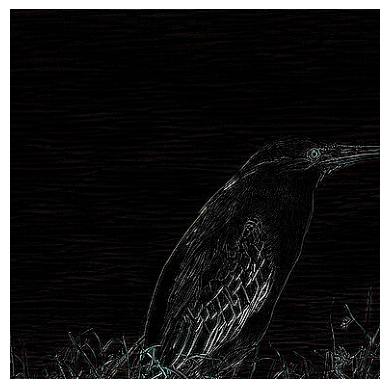

In [ ]:
# another type of Kernel filter
kernel_2 = np.array([
    [0, -1, 0],
    [-1, 4,-1],
    [0, -1, 0]
])
image_sharp = cv2.filter2D(image_cropped, -1, kernel_2)
plt.imshow(image_sharp), plt.axis("off")
plt.show()
# increasing contrast can draw the outline

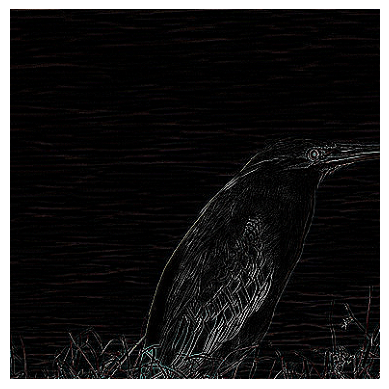

In [ ]:
# reserve the contrast
kernel_2 = np.array([
    [0, 1, 0],
    [1, -4,1],
    [0, 1, 0]
])
image_sharp = cv2.filter2D(image_cropped, -1, kernel_2)
plt.imshow(image_sharp), plt.axis("off")
plt.show()

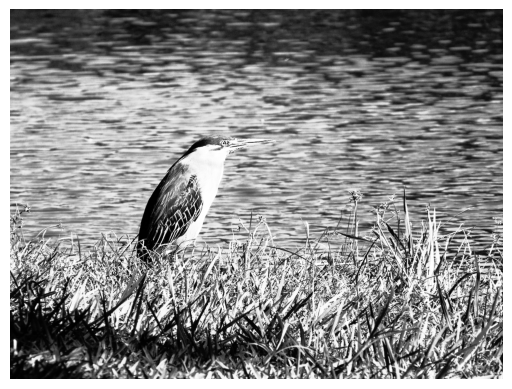

In [ ]:
# Enhance contrasting grey
image_enhanced = cv2.equalizeHist(image_grey)
plt.imshow(image_enhanced, cmap='gray'), plt.axis("off")
plt.show()

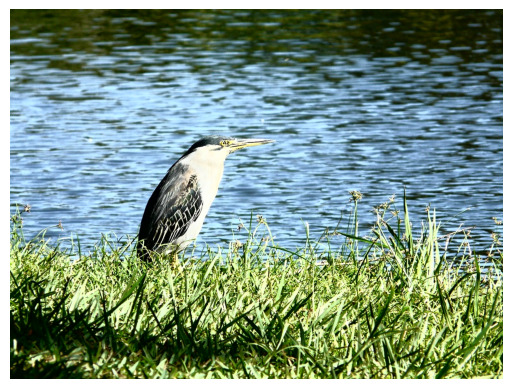

In [ ]:
# Enhance contrasting colour
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV) # Apply histogram equalization
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0]) # Convert to RGB
image_enhenced_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)
plt.imshow(image_enhenced_rgb), plt.axis("off")
plt.show()

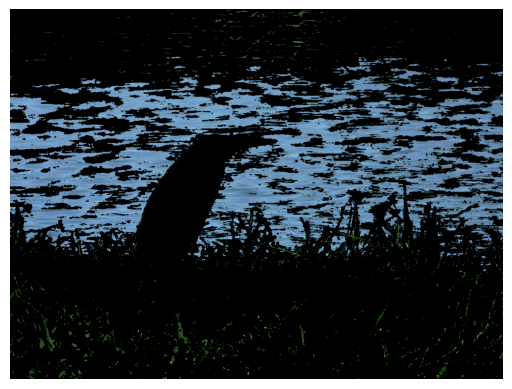

In [ ]:
# isolate colour
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# Define range of blue values in HSV
lower_blue = np.array([50,100,50])
upper_blue = np.array([130,255,255])

# Create mask
mask = cv2.inRange(image_hsv, lower_blue, upper_blue) # Mask image
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask) # Convert BGR to RGB
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

(<matplotlib.image.AxesImage at 0x7f7c2fca8f70>, (-0.5, 1023.5, 767.5, -0.5))

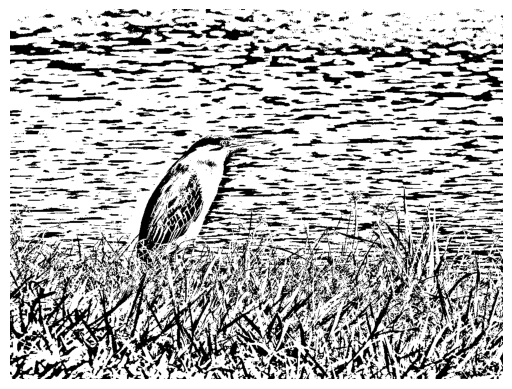

In [ ]:
# Apply adaptive thresholding
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_grey,
                                        max_output_value,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY,
                                        neighborhood_size,
                                        subtract_from_mean)
plt.imshow(image_binarized, cmap="gray"), plt.axis("off")

# need to trial and error on the value input
# the purpose is detecting edge in the image

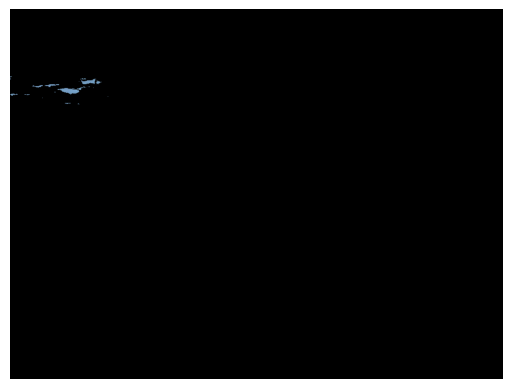

In [ ]:
# removing background

# Rectangle values: start x, start y, width, height
rectangle = (0, 56, 256, 150) # Create initial mask
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# Create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Run grabCut
cv2.grabCut(
    image_rgb, # Our image
    mask, # The Mask
    rectangle, # Our rectangle
    bgdModel, # Temporary array for background
    fgdModel, # Temporary array for background
    5, # Number of iterations
    cv2.GC_INIT_WITH_RECT

) # Initiative using our rectangle

# Create mask where sure and likely backgrounds set to 0, otherwise 1
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# Multiply image with new mask to subtract background
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# Show image
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()

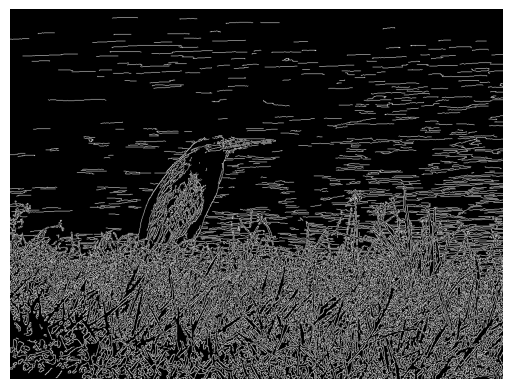

In [ ]:
# detect edge
# Calculate median intensity
median_intensity = np.median(image_grey)

lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

# Apply canny edge detector
image_canny = cv2.Canny(image_grey, lower_threshold, upper_threshold)

# Show image
plt.imshow(image_canny, cmap="gray"), plt.axis("off")
plt.show()